In [1]:
import pandas as pd

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.tail()
data.drop(['oldpeak'],axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,0,3,0
300,68,1,0,144,193,1,1,141,0,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,1,3,0


In [3]:
from sklearn.model_selection import train_test_split

x = data.drop('target',axis=1)
y=data['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=64)


In [4]:
from sklearn.ensemble import RandomForestClassifier

rcelf = RandomForestClassifier()

In [5]:
rcelf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
y_pred = rcelf.predict(x_test)

In [7]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 Score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.8351648351648352
Precision: 0.8181818181818182
Recall: 0.9
F1 Score: 0.8571428571428571


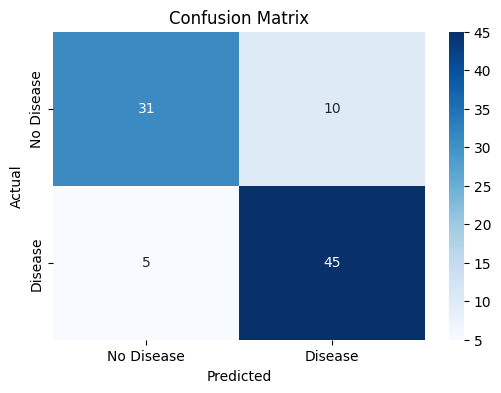

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

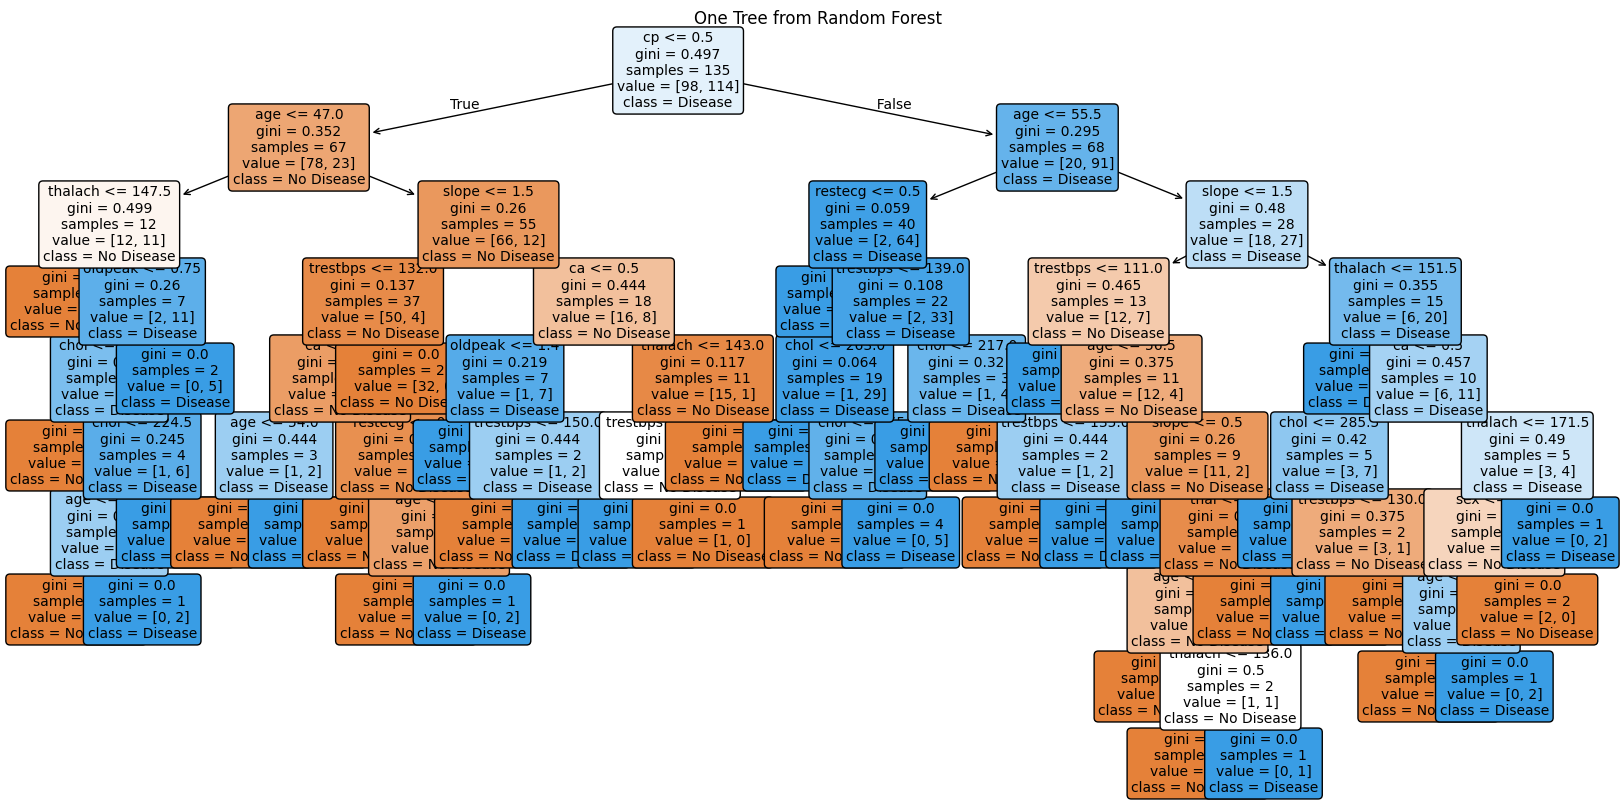

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rcelf.estimators_[0], feature_names=x.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True, fontsize=10)
plt.title("One Tree from Random Forest")
plt.show()